<a href="https://colab.research.google.com/github/ddungi/study_python/blob/main/diverse_models_with_wine_quality_red.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality-red/winequality-red.csv


In [ ]:

## 기본 패키지 모음
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #시각화
import seaborn as sns
 
## 전처리 및 모델링 준비를 위한 패키지
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


## 실제 모델링을 위한 패키지

from sklearn.ensemble import RandomForestClassifier
#기본 결정트리는 해당 데이터에 대해 맞춰서 분류를 진행한 것이어서 과적합 문제 발생
#앙상블 기법으로 고안된 것이 랜덤포레스트
#특정 특성을 선택하는 다수의 결정 트리로 회귀의 결과도출에 사용
#대표적인 배깅 모델

from sklearn.linear_model import LogisticRegression
#이진 분류 수행하는데 사용됨
#각 features 계수 log-odds를 구한 후 sigmoid 함수 적용하여 해당 클래스가 속할 확률을 0~1 사이 값으로 나타냄

from sklearn.svm import SVC
#분류 과제 사용, 결정 경계(Decision Boundary), 즉 분류를 위한 기준 선을 정의하는 모델
#파라미터 c /디폴트 1/ 클수록 하드마진(오류 허용 안함),작을수록 소프르마진(오류를 허용함)

from sklearn import tree
#Decision Tree는 overfitting될 가능성이 높다는 약점이 있다.
#이를 보완하기 위한 것이 랜덤포레스트의 기원이 되는 아이디어.

from sklearn.neighbors import KNeighborsClassifier
# k-최근접 이웃을 활용한 분류
#분류를 알 수 없는 데이터에 대해 가장 가까운 이웃 k개의 분류를 확인하여 다수결을 할 수 있다.

from sklearn.naive_bayes import GaussianNB
#각 피처가 독립이라고 가정하고 예측
#베이즈 정리에 기반,
#사후확률(일종의 조건부 결합확률)의 계산 시 조건부 독립을 가정하여 계산을 단순화한 방법이다.

from sklearn.metrics import classification_report
from sklearn import metrics #모델 평가

col=['fixed acidity',"volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur",'density','pH','sulphates','alcohol','quality']
df = pd.read_csv('../input/wine-quality-red/winequality-red.csv', sep=';',header=1,names=col)


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur,density,pH,sulphates,alcohol,quality
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fixed acidity        1598 non-null   float64
 1   volatile acidity     1598 non-null   float64
 2   citric acid          1598 non-null   float64
 3   residual sugar       1598 non-null   float64
 4   chlorides            1598 non-null   float64
 5   free sulfur dioxide  1598 non-null   float64
 6   total sulfur         1598 non-null   float64
 7   density              1598 non-null   float64
 8   pH                   1598 non-null   float64
 9   sulphates            1598 non-null   float64
 10  alcohol              1598 non-null   float64
 11  quality              1598 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.9 KB


In [ ]:
bins=(2,6.5,8) #범주화
group_names=['bad','good']
df['quality']=pd.cut(df['quality'],bins=bins,labels=group_names)

In [ ]:
label_quality=LabelEncoder() #범주화를 더미함수화
df['quality']=label_quality.fit_transform(df['quality'])

In [ ]:
df['quality'].value_counts()

0    1381
1     217
Name: quality, dtype: int64

In [ ]:
x=df.drop('quality',axis=1)
y=df['quality']

In [ ]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
sc=StandardScaler() #표준화
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
#변수중요도 시각화 함수
def plot_feature_importance(model, X_train, figsize=(12, 6)):

    sns.set_style('darkgrid')

   # Plot feature importance

    feature_importance = model.feature_importances_

    feature_importance = 100.0 * (feature_importance / feature_importance.max())

    sorted_idx = np.argsort(feature_importance)

    pos = np.arange(sorted_idx.shape[0]) + .5



    plt.figure(figsize=figsize)

    plt.barh(pos, feature_importance[sorted_idx], align='center')

    plt.yticks(pos, X_train.columns[sorted_idx])

    plt.xlabel('Relative Importance')

    plt.title('Variable Importance')

    plt.show()

In [ ]:
#랜덤포레스트
rfc=RandomForestClassifier(n_estimators=200)

rfc.fit(x_train,y_train)

pred_rfc=rfc.predict(x_test)

print(classification_report(y_test,pred_rfc))

print("Accuracy:", metrics.accuracy_score(y_test, pred_rfc))
print("Precision:", metrics.precision_score(y_test, pred_rfc))
print("Recall:", metrics.recall_score(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       278
           1       0.67      0.43      0.52        42

    accuracy                           0.90       320
   macro avg       0.79      0.70      0.73       320
weighted avg       0.89      0.90      0.89       320

Accuracy: 0.896875
Precision: 0.6666666666666666
Recall: 0.42857142857142855


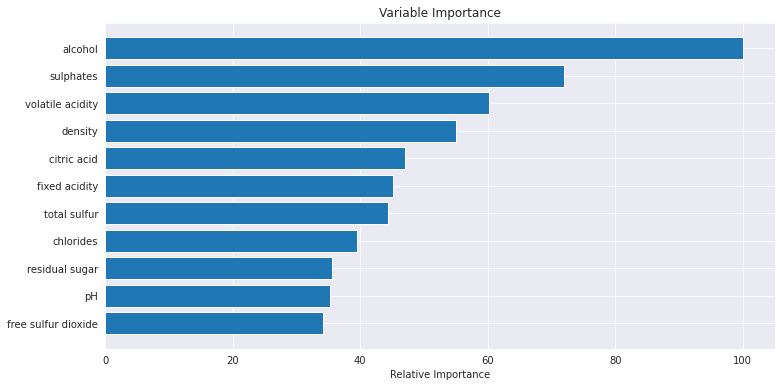

In [ ]:

plot_feature_importance(rfc,x)

In [ ]:
#SVC 모델 
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print(classification_report(y_test, pred_svc))
print("Accuracy:", metrics.accuracy_score(y_test, pred_svc))
print("Precision:", metrics.precision_score(y_test, pred_svc))
print("Recall:", metrics.recall_score(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       278
           1       0.67      0.24      0.35        42

    accuracy                           0.88       320
   macro avg       0.78      0.61      0.64       320
weighted avg       0.87      0.88      0.86       320

Accuracy: 0.884375
Precision: 0.6666666666666666
Recall: 0.23809523809523808


In [ ]:
#로지스틱 회귀

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print(classification_report(y_test,pred_lr))
print("Accuracy:", metrics.accuracy_score(y_test, pred_lr))
print("Precision:", metrics.precision_score(y_test, pred_lr))
print("Recall:", metrics.recall_score(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       278
           1       0.48      0.24      0.32        42

    accuracy                           0.87       320
   macro avg       0.68      0.60      0.62       320
weighted avg       0.84      0.87      0.85       320

Accuracy: 0.865625
Precision: 0.47619047619047616
Recall: 0.23809523809523808


In [ ]:
##결정나무 모델
dt=tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
print(classification_report(y_test,pred_dt))
print("Accuracy:", metrics.accuracy_score(y_test, pred_dt))
print("Precision:", metrics.precision_score(y_test, pred_dt))
print("Recall:", metrics.recall_score(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       278
           1       0.50      0.57      0.53        42

    accuracy                           0.87       320
   macro avg       0.72      0.74      0.73       320
weighted avg       0.88      0.87      0.87       320

Accuracy: 0.86875
Precision: 0.5
Recall: 0.5714285714285714


In [ ]:
#knn 모델
knn=KNeighborsClassifier(5)
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print(classification_report(y_test,pred_knn))
print("Accuracy:", metrics.accuracy_score(y_test, pred_knn))
print("Precision:", metrics.precision_score(y_test, pred_knn))
print("Recall:", metrics.recall_score(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       278
           1       0.58      0.36      0.44        42

    accuracy                           0.88       320
   macro avg       0.74      0.66      0.69       320
weighted avg       0.86      0.88      0.87       320

Accuracy: 0.88125
Precision: 0.5769230769230769
Recall: 0.35714285714285715


In [ ]:
#베이지안 모델

by=GaussianNB()
by.fit(x_train,y_train)
pred_by=by.predict(x_test)
print(classification_report(y_test,pred_by))
print("Accuracy:", metrics.accuracy_score(y_test, pred_by))
print("Precision:", metrics.precision_score(y_test, pred_by))
print("Recall:", metrics.recall_score(y_test, pred_by))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       278
           1       0.46      0.67      0.54        42

    accuracy                           0.85       320
   macro avg       0.70      0.77      0.73       320
weighted avg       0.88      0.85      0.86       320

Accuracy: 0.853125
Precision: 0.45901639344262296
Recall: 0.6666666666666666
